<a href="https://colab.research.google.com/github/ELROKA02/Colab-notebooks/blob/main/Bitcoin_an%C3%A1lisis_por_periodos_y_ciclos_de_halving(4_a%C3%B1os).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definición del objetivo y del enfoque del análisis
En este cuaderno se analiza si el comportamiento de Bitcoin cambia a lo largo del tiempo y, en particular, si existen patrones cíclicos asociados a los halvings.
La motivación de este análisis surge de la hipótesis ampliamente difundida de que Bitcoin sigue un ciclo aproximado de cuatro años, vinculado a la reducción periódica de la recompensa por bloque.

El objetivo no es asumir que dicho ciclo existe ni utilizarlo para predecir precios futuros, sino evaluar de forma cuantitativa y crítica si los datos históricos muestran cambios sistemáticos en métricas clave como retornos, volatilidad y riesgo entre distintos periodos y entre ciclos definidos por los halvings.

El análisis se plantea desde un enfoque puramente descriptivo y estadístico, utilizando datos históricos diarios de Bitcoin ya preparados en cuadernos anteriores. Los halvings se emplean únicamente como marcadores temporales objetivos para segmentar el histórico, evitando interpretaciones narrativas o conclusiones deterministas.

Este cuaderno busca, por tanto, entender el comportamiento de Bitcoin según el contexto temporal, sentando una base sólida para análisis más avanzados en cuadernos posteriores.

# 2. Carga de librerías y datos
Antes de comenzar cualquier análisis es necesario importar las librerías básicas y cargar el dataset de Bitcoin que se utilizará en todo el cuaderno.

En este punto no se realiza ningún tratamiento de datos ni cálculos estadísticos.
El objetivo es únicamente:
- disponer de las herramientas necesarias
- cargar el histórico de precios en un DataFrame
- verificar que los datos se han leído correctamente

Trabajaremos con el dataset de 1 minuto de Bitcoin,en el que limpiaremos los datos y agruparemos por día, para asegurar coherencia y evitar repetir procesos innecesarios.

In [1]:
import kagglehub
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

100%|██████████| 99.2M/99.2M [00:05<00:00, 18.5MB/s]

Extracting files...


In [2]:
import pandas as pd
import numpy as np
import os
os.listdir(path)

['btcusd_1-min_data.csv']

In [3]:
tabla = path + "/" + "btcusd_1-min_data.csv"

In [4]:
df = pd.read_csv(tabla)
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


# 3. Limpieza y preparacion de datos
En este paso se realiza la limpieza básica y preparación temporal del dataset de Bitcoin, necesaria para poder trabajar con datos consistentes a lo largo del cuaderno.

El dataset original se encuentra en formato intradía (minutos) y con la columna de tiempo en formato timestamp. Para el análisis por periodos y ciclos de halving es imprescindible:

- convertir correctamente la columna temporal a formato datetime
- establecerla como índice del DataFrame
- reagrupar los datos a frecuencia diaria
- eliminar posibles inconsistencias derivadas del cambio de granularidad

Esta limpieza no busca optimizar ni transformar el comportamiento del activo, sino homogeneizar los datos en una escala temporal adecuada para el análisis estadístico posterior.

Una vez completado este paso, se trabajará exclusivamente con datos diarios, asegurando coherencia con los cuadernos anteriores y facilitando la comparación entre distintos periodos históricos.

In [5]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.set_index('Date')
df_daily = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
})

In [6]:
# Veamos la primera y ultima fecha
print(df_daily.index.min())
print(df_daily.index.max())

2012-01-01 00:00:00
2026-01-10 00:00:00


In [7]:
df_daily.head()

,Open,High,Low,Close
Date,,,,
2012-01-01,4.58,4.84,4.58,4.84
2012-01-02,4.84,5.00,4.84,5.00
2012-01-03,5.00,5.32,5.00,5.29
2012-01-04,5.29,5.57,4.93,5.57
2012-01-05,5.57,6.46,5.57,6.42


In [8]:
df_daily.tail()

,Open,High,Low,Close
Date,,,,
2026-01-06,93876.0,94418.0,91221.0,93712.0
2026-01-07,93712.0,93712.0,90526.0,91273.0
2026-01-08,91273.0,91562.0,89199.0,91031.0
2026-01-09,91032.0,91924.0,89596.0,90510.0
2026-01-10,90510.0,90694.0,90286.0,90382.0


# 4. Definición de los periodos y ciclos de halving
En este paso se definen los periodos temporales que se utilizarán en el análisis, poniendo el foco principal en los ciclos de Bitcoin delimitados por los halvings.

El halving se utiliza como referencia temporal objetiva, ya que introduce un cambio estructural en la emisión de Bitcoin y permite dividir el histórico en bloques comparables, evitando segmentaciones arbitrarias.

Para cada ciclo se establece:
- la fecha de inicio (halving)
- la fecha de fin (siguiente halving o final del dataset)
- si el ciclo está completo o incompleto

Esta definición es clave, ya que condiciona todo el análisis posterior. A partir de estos ciclos se calcularán métricas estadísticas, se compararán comportamientos entre periodos y se evaluará la hipótesis del ciclo de cuatro años de forma cuantitativa.

No se extraen conclusiones en este punto, únicamente se establecen las fronteras temporales sobre las que se trabajará en los siguientes pasos.

### Halvings
- Ciclo 1:
28-11-2012 --> 08-07-2016
- Ciclo 2:
09-07-2016 --> 10-05-2020
- Ciclo 3:
11-05-2020 --> 19-04-2024
- Ciclo 4:
20-04-2024 --> fin del dataset

In [9]:
halving_1 = pd.to_datetime('2012-11-28')
halving_2 = pd.to_datetime('2016-07-09')
halving_3 = pd.to_datetime('2020-05-11')
halving_4 = pd.to_datetime('2024-04-20')

In [10]:
primer_ciclo = [halving_1, halving_2 - pd.Timedelta(days=1)]
segundo_ciclo = [halving_2, halving_3 - pd.Timedelta(days=1)]
tercer_ciclo = [halving_3, halving_4 - pd.Timedelta(days=1)]
cuarto_ciclo = [halving_4, df_daily.index.max()]  # ciclo incompleto

In [11]:
ciclos = {
    "2012_2016": primer_ciclo,
    "2016_2020": segundo_ciclo,
    "2020_2024": tercer_ciclo,
    "2024_actual": cuarto_ciclo
}

In [12]:
# Filtramos df por ciclos
df_ciclos = {}

for nombre, (inicio, fin) in ciclos.items():
    df_ciclos[nombre] = df_daily.loc[inicio:fin]

In [13]:
for nombre, df in df_ciclos.items():
    print(
        nombre,
        "inicio:", df.index.min().date(),
        "fin:", df.index.max().date(),
        "días:", len(df)
    )

2012_2016 inicio: 2012-11-28 fin: 2016-07-08 días: 1319
2016_2020 inicio: 2016-07-09 fin: 2020-05-10 días: 1402
2020_2024 inicio: 2020-05-11 fin: 2024-04-19 días: 1440
2024_actual inicio: 2024-04-20 fin: 2026-01-10 días: 631


# 5. Retornos y estadística básica por ciclo
Una vez definidos los ciclos de halving, se analizan los retornos diarios de Bitcoin dentro de cada ciclo para comparar su comportamiento estadístico a lo largo del tiempo.

Trabajar con retornos permite comparar periodos distintos de forma homogénea, independientemente del nivel de precios. Para cada ciclo se calculan métricas básicas que describen rentabilidad, volatilidad y riesgo.

El objetivo de este paso es detectar diferencias y similitudes entre ciclos, y comprobar si el comportamiento de Bitcoin cambia de forma consistente entre un halving y el siguiente.

Este análisis sirve como base para evaluar, en pasos posteriores, la hipótesis del ciclo de cuatro años desde un punto de vista estadístico.

In [14]:
df_retornos = {}

for nombre, df in df_ciclos.items():
    df = df.copy()
    df['retorno_diario'] = df['Close'].pct_change()
    df_retornos[nombre] = df.dropna()

In [15]:
def estadisticas_basicas(retornos):
    return {
        "media": retornos.mean(),
        "volatilidad": retornos.std(),
        "skewness": retornos.skew(),
        "kurtosis": retornos.kurtosis(),
        "retorno_acumulado": (1 + retornos).prod() - 1
    }

In [16]:
# Calculamos estadistica por ciclo
estadisticas_ciclos = {}

for nombre, df in df_retornos.items():
    stats = estadisticas_basicas(df['retorno_diario'])
    estadisticas_ciclos[nombre] = stats


In [17]:
df_stats = pd.DataFrame(estadisticas_ciclos).T
df_stats

,media,volatilidad,skewness,kurtosis,retorno_acumulado
2012_2016,0.004379,0.050576,-0.659446,20.871146,52.604098
2016_2020,0.002752,0.042492,-0.010761,4.251892,12.261403
2020_2024,0.001935,0.033122,0.082986,3.446524,6.345353
2024_actual,0.000807,0.023790,0.293135,2.263794,0.392742


# 6. Interpretación de los resultados por ciclo
En este paso se interpretan y comparan las métricas estadísticas obtenidas para cada ciclo de halving.

El objetivo es observar cómo cambia el comportamiento de Bitcoin entre ciclos, analizando diferencias en retornos, volatilidad y riesgo, y evaluar si existen patrones comunes que respalden la hipótesis del ciclo de cuatro años.

Este análisis es descriptivo y no pretende predecir el comportamiento futuro, sino entender las diferencias y similitudes entre ciclos históricos.

In [18]:
# Vemos la tabla en orden por orden de retorno acumulado
df_stats.sort_values(by="retorno_acumulado", ascending=False)

,media,volatilidad,skewness,kurtosis,retorno_acumulado
2012_2016,0.004379,0.050576,-0.659446,20.871146,52.604098
2016_2020,0.002752,0.042492,-0.010761,4.251892,12.261403
2020_2024,0.001935,0.033122,0.082986,3.446524,6.345353
2024_actual,0.000807,0.023790,0.293135,2.263794,0.392742


In [19]:
# ¿cuanto se ha reducido la volatilidad desde el primer ciclo?
(df_stats["volatilidad"] / df_stats.loc["2012_2016", "volatilidad"] - 1) * 100

,volatilidad
2012_2016,0.000000
2016_2020,-15.983329
2020_2024,-34.510244
2024_actual,-52.962660


### Conclusión
Los resultados muestran un patrón claro de maduración de Bitcoin a lo largo de los ciclos de halving.
El primer ciclo (2012–2016) concentra con diferencia el mayor retorno acumulado, acompañado también de la mayor volatilidad y riesgo extremo (kurtosis muy elevada).

A medida que avanzan los ciclos:
- el retorno acumulado disminuye de forma progresiva
- la volatilidad se reduce de manera consistente (hasta más de un 50 % respecto  al primer ciclo)
- la distribución de retornos se vuelve menos extrema, con colas más moderadas

Esto sugiere que el llamado ciclo de cuatro años no se repite con la misma intensidad, sino que se debilita con el tiempo, tanto en rentabilidad como en riesgo. Bitcoin sigue siendo volátil, pero cada ciclo lo es menos que el anterior.

# 7. Drawdown máximo por ciclo
Hasta ahora has visto retornos y volatilidad. Eso está bien, pero el drawdown te dice cuánto duele de verdad cada ciclo.

En este paso:
- calculamos el drawdown máximo dentro de cada ciclo
- lo añadimos a la tabla de estadísticas
- lo usamos para reforzar (o matizar) las conclusiones anteriores


In [20]:
def max_drawdown(precios):
    max_acumulado = precios.cummax()
    drawdown = (precios / max_acumulado) - 1
    return drawdown.min()

In [21]:
drawdowns = {}

for nombre, df in df_ciclos.items():
    drawdowns[nombre] = max_drawdown(df["Close"])

In [22]:
df_stats["drawdown_maximo"] = pd.Series(drawdowns)
df_stats

,media,volatilidad,skewness,kurtosis,retorno_acumulado,drawdown_maximo
2012_2016,0.004379,0.050576,-0.659446,20.871146,52.604098,-0.841841
2016_2020,0.002752,0.042492,-0.010761,4.251892,12.261403,-0.831646
2020_2024,0.001935,0.033122,0.082986,3.446524,6.345353,-0.764599
2024_actual,0.000807,0.023790,0.293135,2.263794,0.392742,-0.321091


# 8. Visualización de los ciclos
El precio de Bitcoin normalizado en cada ciclo, para poder compararlos aunque los precios absolutos sean distintos.

Normalizar = todos empiezan en 1.
Asi comparamos los ciclos.

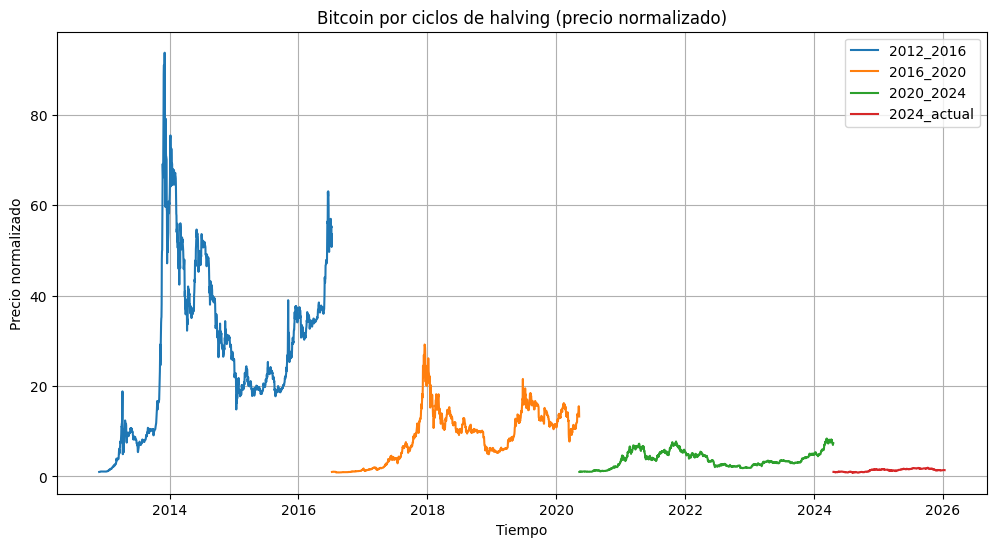

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for nombre, df in df_ciclos.items():
    precios_normalizados = df["Close"] / df["Close"].iloc[0]
    plt.plot(precios_normalizados, label=nombre)

plt.title("Bitcoin por ciclos de halving (precio normalizado)")
plt.xlabel("Tiempo")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid(True)

plt.show()


El gráfico muestra que Bitcoin sigue un patrón cíclico asociado a los halvings, pero con una pérdida progresiva de intensidad.

Los primeros ciclos presentan crecimientos mucho más explosivos, mientras que los ciclos recientes muestran una pendiente más suave y estable, lo que sugiere una maduración del activo y una reducción de los retornos extremos con el tiempo.

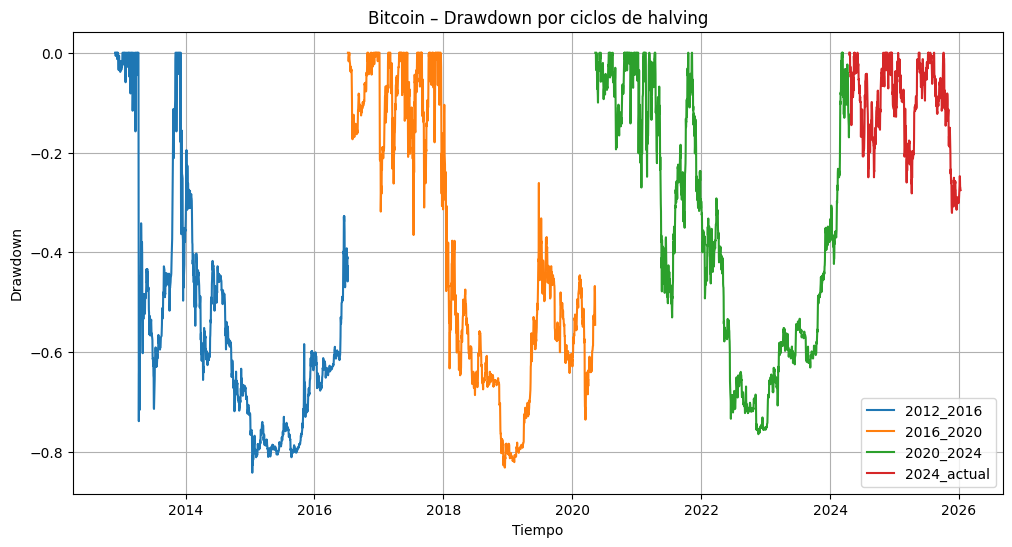

In [24]:
plt.figure(figsize=(12, 6))

for nombre, df in df_ciclos.items():
    precios = df["Close"]
    max_acumulado = precios.cummax()
    drawdown = (precios / max_acumulado) - 1
    plt.plot(drawdown, label=nombre)

plt.title("Bitcoin – Drawdown por ciclos de halving")
plt.xlabel("Tiempo")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)

plt.show()

Los drawdowns máximos de Bitcoin han sido muy profundos en los primeros ciclos, reflejando un mercado inmaduro y altamente especulativo.

En ciclos posteriores, aunque las caídas siguen siendo relevantes, su profundidad tiende a reducirse, lo que indica una disminución progresiva del riesgo extremo. Bitcoin sigue siendo volátil, pero cada ciclo “duele menos” que el anterior.



---
### ¿Cuanto se reduce el drawdown cada año y que se estima para este ciclo?


In [25]:
drawdowns_completos = df_stats.loc[
    ["2012_2016", "2016_2020", "2020_2024"],
    "drawdown_maximo"
]

In [32]:
dd_abs = drawdowns_completos.abs()
reduccion_drawdown = dd_abs.pct_change()
reduccion_drawdown

,drawdown_maximo
2012_2016,NaN
2016_2020,-0.01211
2020_2024,-0.08062


In [33]:
reduccion_media = reduccion_drawdown.dropna().mean()
reduccion_media

np.float64(-0.046364879678402526)

In [34]:
ultimo_dd = dd_abs.iloc[-1]
drawdown_referencia = -ultimo_dd * (1 + reduccion_media)
drawdown_referencia

np.float64(-0.7291486124222163)

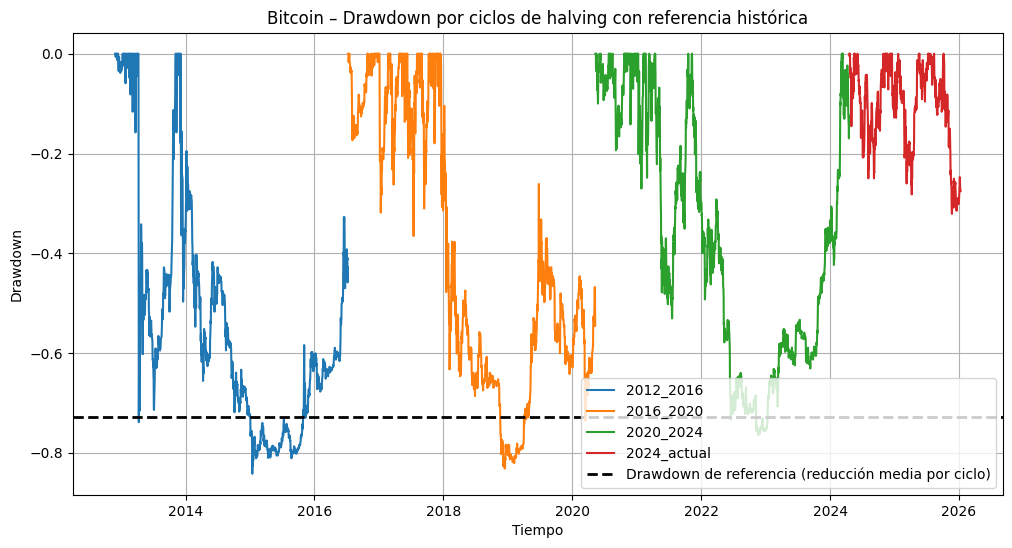

In [36]:
plt.figure(figsize=(12, 6))

# Drawdown real por ciclo
for nombre, df in df_ciclos.items():
    precios = df["Close"]
    max_acumulado = precios.cummax()
    drawdown = (precios / max_acumulado) - 1
    plt.plot(drawdown, label=nombre)

# Línea de referencia basada en la reducción media por ciclo
plt.axhline(
    y=drawdown_referencia,
    color="black",
    linestyle="--",
    linewidth=2,
    label="Drawdown de referencia (reducción media por ciclo)"
)

plt.title("Bitcoin – Drawdown por ciclos de halving con referencia histórica")
plt.xlabel("Tiempo")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)

plt.show()

La línea discontinua representa un drawdown de referencia estimado a partir de la reducción media observada entre ciclos de halving consecutivos.

No constituye una predicción del drawdown del ciclo actual, sino un benchmark histórico que permite contextualizar la magnitud de las caídas observadas.

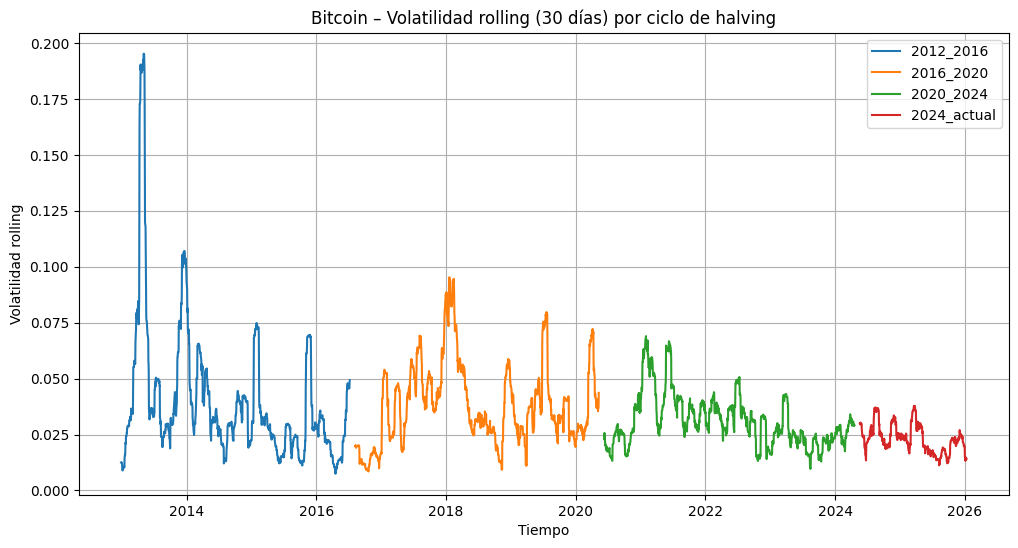

In [27]:
ventana = 30  # volatilidad rolling de 30 días

plt.figure(figsize=(12, 6))

for nombre, df in df_retornos.items():
    volatilidad_rolling = df["retorno_diario"].rolling(ventana).std()
    plt.plot(volatilidad_rolling, label=nombre)

plt.title("Bitcoin – Volatilidad rolling (30 días) por ciclo de halving")
plt.xlabel("Tiempo")
plt.ylabel("Volatilidad rolling")
plt.legend()
plt.grid(True)

plt.show()

La volatilidad de Bitcoin no es constante, sino que se concentra en fases concretas dentro de cada ciclo.

Los ciclos antiguos muestran picos de volatilidad más frecuentes y violentos, mientras que los ciclos recientes presentan una volatilidad más contenida y estructurada, reforzando la hipótesis de una evolución hacia un mercado más maduro.

/tmp/ipython-input-1749936219.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=labels, showfliers=True)


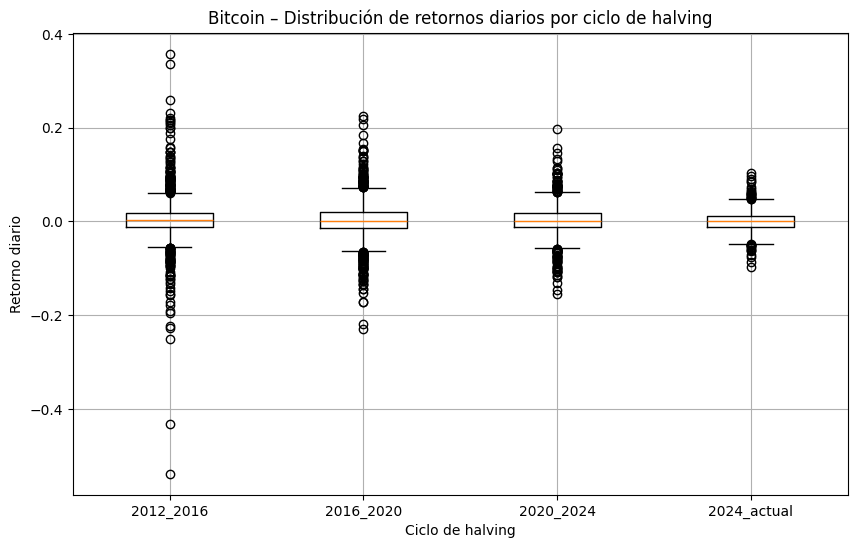

In [28]:
datos = []
labels = []

for nombre, df in df_retornos.items():
    datos.append(df["retorno_diario"])
    labels.append(nombre)

plt.figure(figsize=(10, 6))
plt.boxplot(datos, labels=labels, showfliers=True)
plt.title("Bitcoin – Distribución de retornos diarios por ciclo de halving")
plt.xlabel("Ciclo de halving")
plt.ylabel("Retorno diario")
plt.grid(True)

plt.show()

La distribución de los retornos diarios confirma que los primeros ciclos presentan mayor dispersión y más eventos extremos, con colas más largas y numerosos outliers.

En los ciclos más recientes, la distribución se vuelve más compacta, lo que indica una reducción de la frecuencia y magnitud de movimientos extremos, coherente con la disminución observada en volatilidad y drawdown.